# Car Price Prediction using Linear Regression


# 1) Imports


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

# 2) Load dataset


In [77]:
cars = pd.read_csv(r"C:\Users\vansh\OneDrive\Desktop\ds_Projects\data=mining\carprice.csv")

# 3) Feature Selection & Preprocessing
features = ["enginesize", "horsepower", "carwidth", "curbweight"]
X = cars[features]
y = cars["price"]

# 2) EDA


In [79]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [80]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Cleaning


In [81]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [83]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

C:\Users\vansh\AppData\Local\Temp\ipykernel_2860\2625071144.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars.CompanyName.replace(a,b,inplace=True)


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [84]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [85]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Graphs

C:\Users\vansh\AppData\Local\Temp\ipykernel_2860\1297256859.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.price)


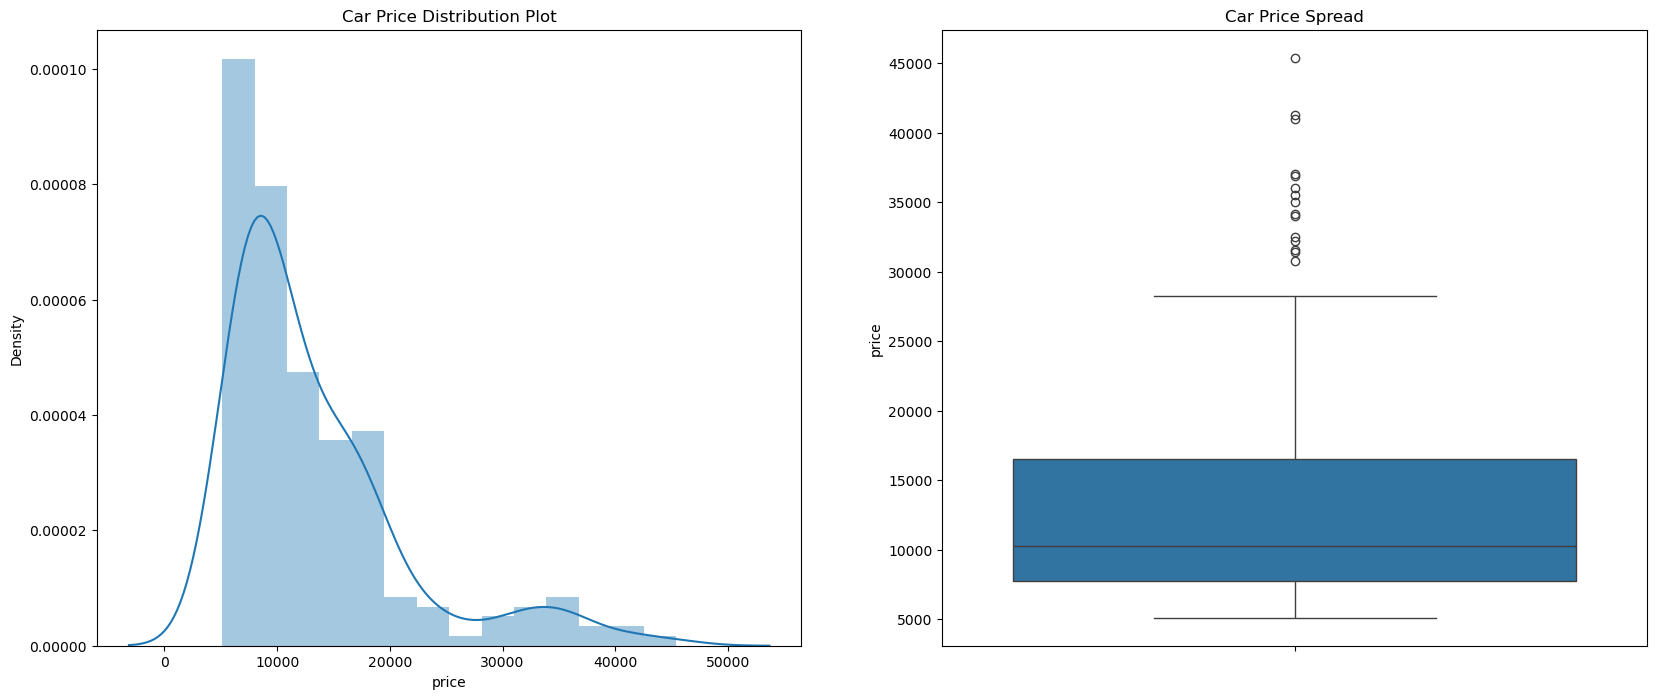

In [86]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [87]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#### Step 3.1 : Visualising Categorical Data

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

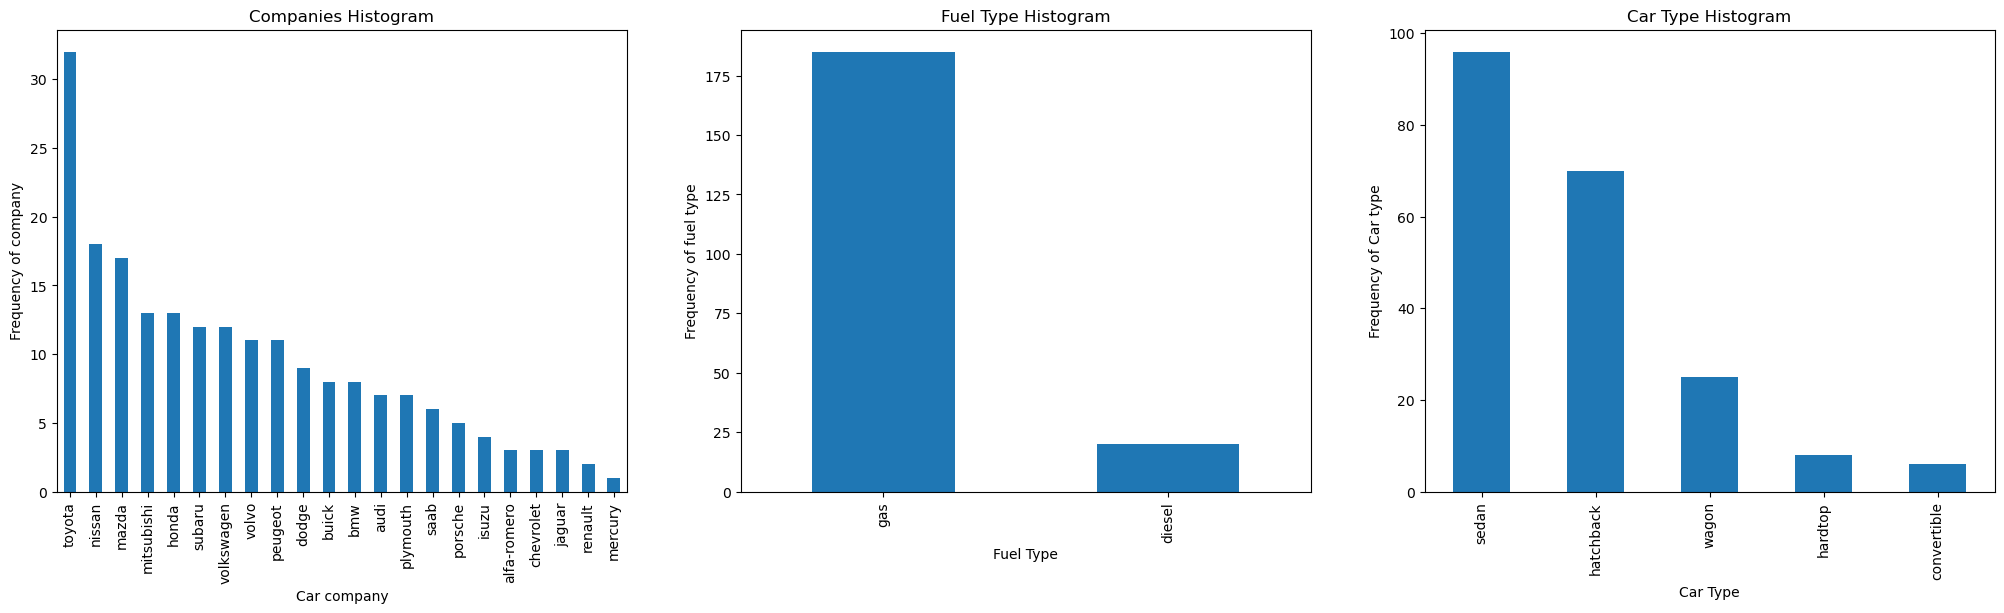

In [88]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot.bar()
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt2 = cars.fueltype.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt2.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt3 = cars.carbody.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt3.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

<Figure size 2500x600 with 0 Axes>

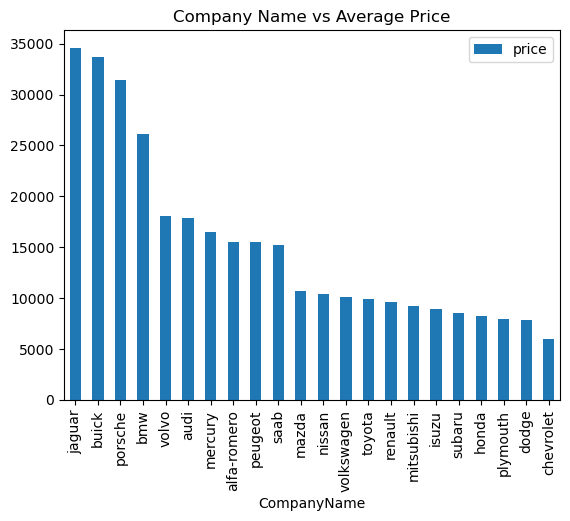

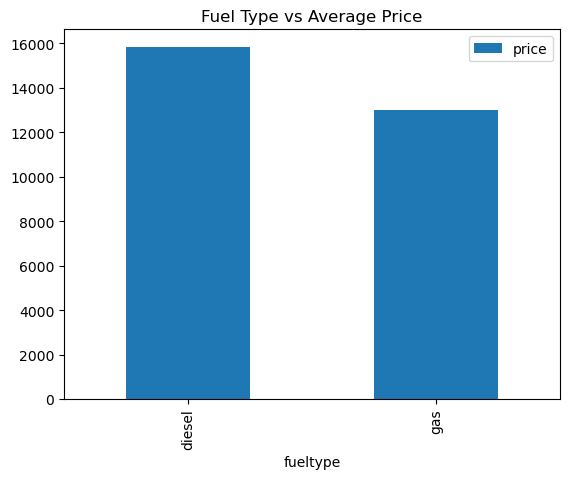

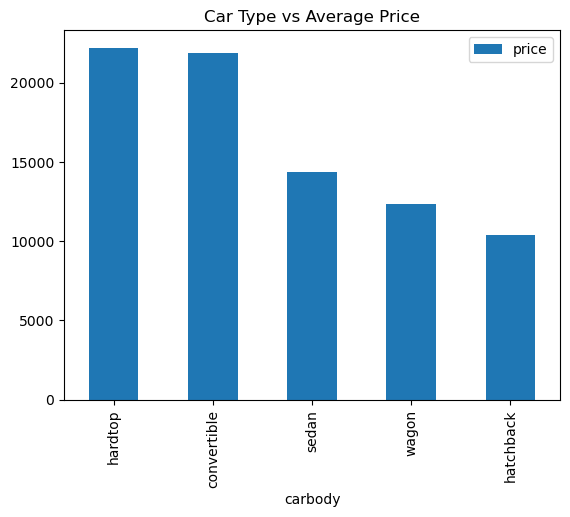

In [89]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Inference :

1. `Jaguar` and `Buick` seem to have highest average price.
2. `diesel` has higher average price than  gas.
3. `hardtop` and `convertible` have higher average price.

C:\Users\vansh\AppData\Local\Temp\ipykernel_2860\2797161189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(cars.doornumber, palette=("plasma"))
C:\Users\vansh\AppData\Local\Temp\ipykernel_2860\2797161189.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))


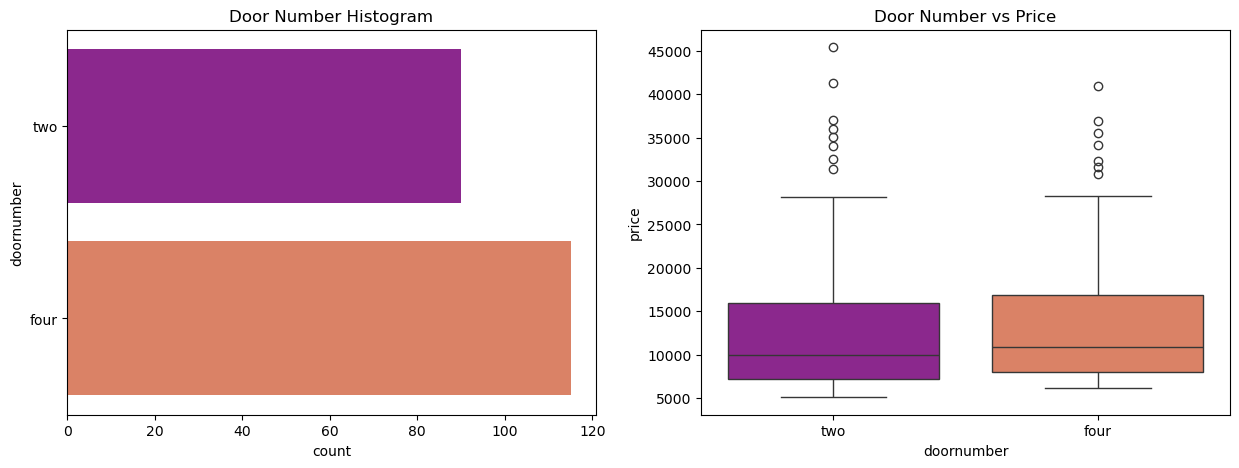

C:\Users\vansh\AppData\Local\Temp\ipykernel_2860\2797161189.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(cars.aspiration, palette=("plasma"))
C:\Users\vansh\AppData\Local\Temp\ipykernel_2860\2797161189.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))


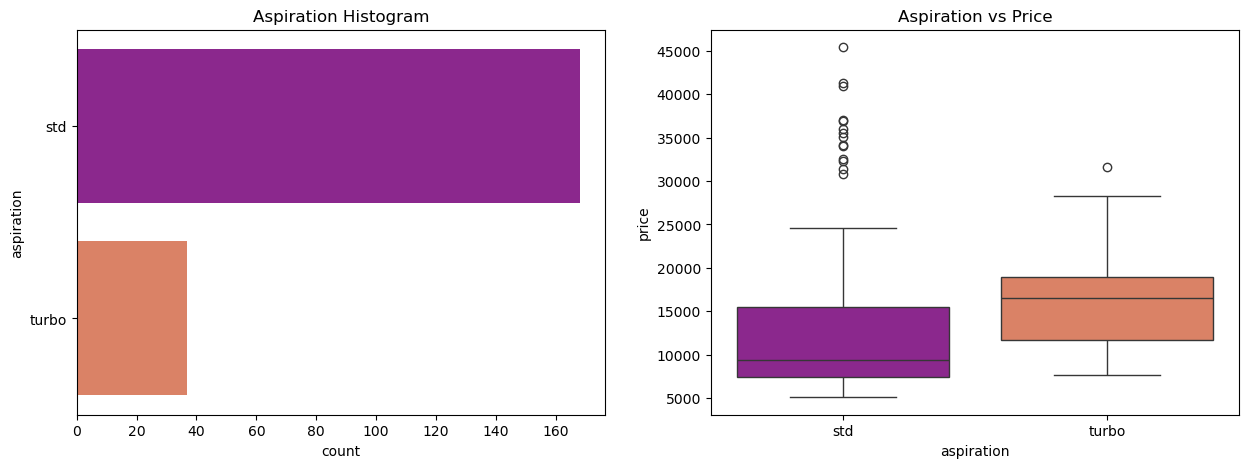

In [90]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


#### Inference :

1. `doornumber` variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

# Numerical Graphs

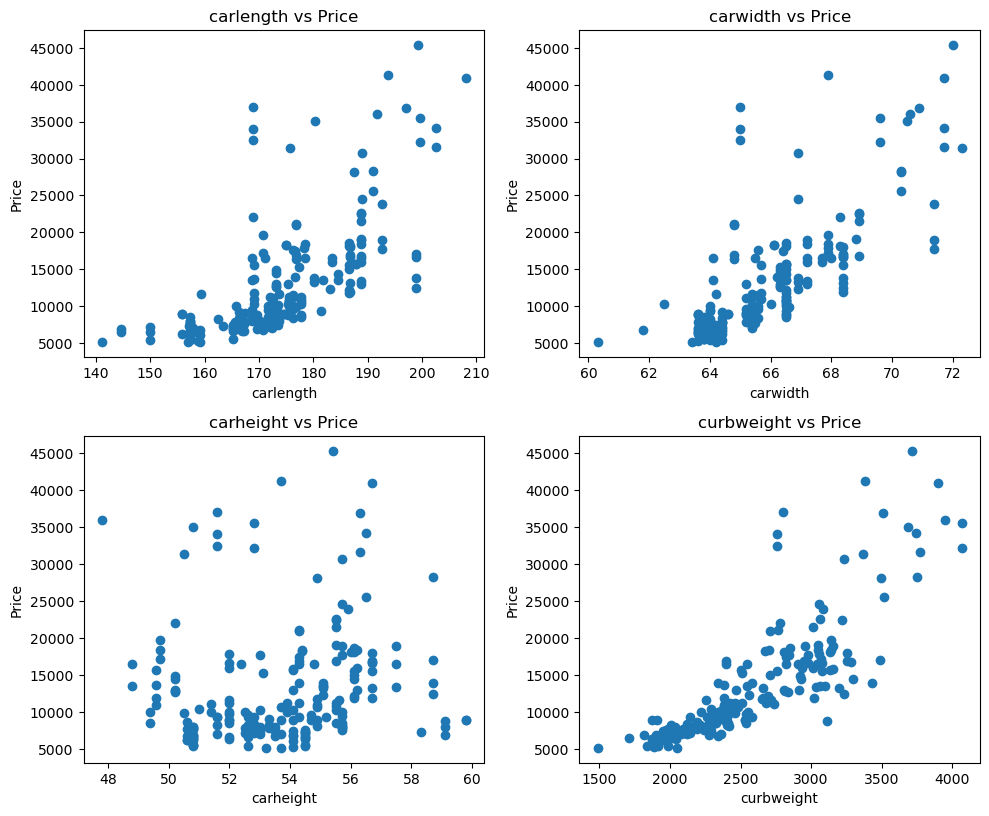

In [91]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### Inference :

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

c:\Users\vansh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


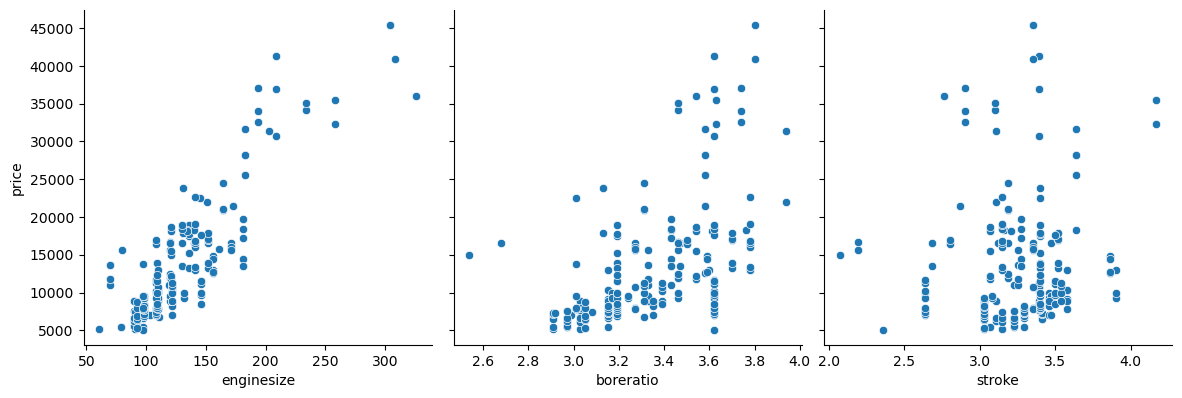

c:\Users\vansh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


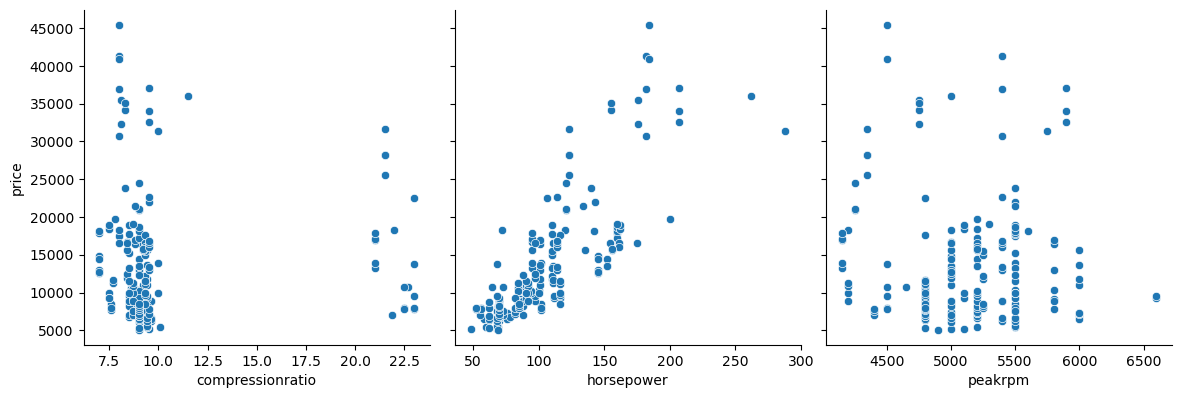

c:\Users\vansh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


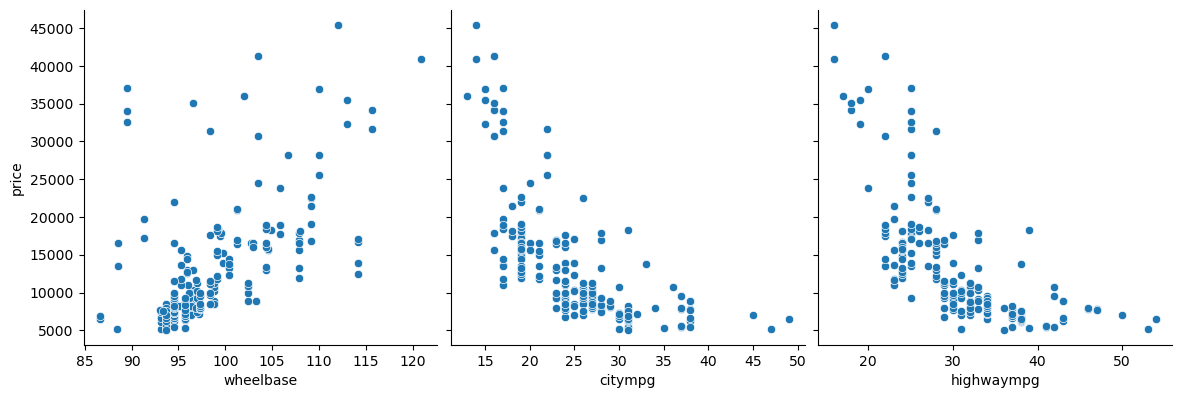

In [92]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

#### Inference :

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
2. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

# Ensure horsepower is numeric


In [93]:
X["horsepower"] = pd.to_numeric(X["horsepower"], errors="coerce")

X = X.dropna()
y = y.loc[X.index]

C:\Users\vansh\AppData\Local\Temp\ipykernel_2860\2901804867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["horsepower"] = pd.to_numeric(X["horsepower"], errors="coerce")


# 4) Train-test split


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Train Linear Regression model


Train-test split is a technique where we divide our dataset into two parts: one for training the model and one for testing it. The training set is used to teach the model the relationship between car features and price, while the test set checks how well the model performs on unseen data. This ensures that our model is not just memorizing but can actually generalize to new cars.

In [95]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# 6) Predictions


In [96]:
y_pred = lr.predict(X_test)

# 7) Evaluation Metrics


In [103]:

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [104]:
print("Model Performance:")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

Model Performance:
RMSE : 3768.73
R²   : 0.82


# 8) Show some example predictions vs actual prices


In [99]:
comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

comparison["Actual Price"] = comparison["Actual Price"].round(2)
comparison["Predicted Price"] = comparison["Predicted Price"].round(2)

print("\nSample Predictions (first 10):")
print(comparison.head(10))


Sample Predictions (first 10):
   Actual Price  Predicted Price
0      30760.00         25823.02
1      17859.17         18798.78
2       9549.00         11334.77
3      11850.00         13652.31
4      28248.00         23815.78
5       7799.00          6599.12
6       7788.00          7802.46
7       9258.00          7335.20
8      10198.00         10675.00
9       7775.00          7226.64


# 9) Scatter Plot: Actual vs Predicted


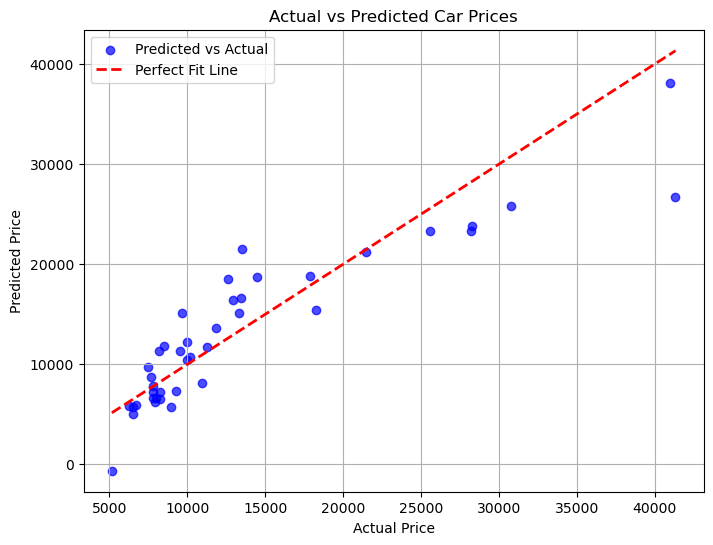

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label="Perfect Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.grid(True)
plt.show()

Here we can see the scatter plot comparing actual car prices with predicted car prices. Each blue dot represents one car from the test dataset. The red dashed line is the perfect prediction line — if the model were 100% accurate, all points would fall exactly on this line.

We can observe that most of the points are close to the line, meaning the predictions are reasonably accurate. However, there are some points farther away, which shows that the model has some errors but still captures the overall trend. In other words, as the actual car price increases, the predicted price also increases, proving that the model is learning the relationship between car features and their prices


You can see one blue dot near zero on the predicted axis. This means that for one car, the model predicted almost zero price while the actual price was around 5,000. This happens because Linear Regression is not perfect and sometimes struggles with unusual data points, called outliers. It also shows that using only four features to predict price may not capture all the details — if we add more features, this kind of error could be reduced.

# 10) Bar Chart: First 15 Predictions


In [101]:
print(df.head(15))


                    price
carbody                  
hardtop      22208.500000
convertible  21890.500000
sedan        14344.270833
wagon        12371.960000
hatchback    10376.652386


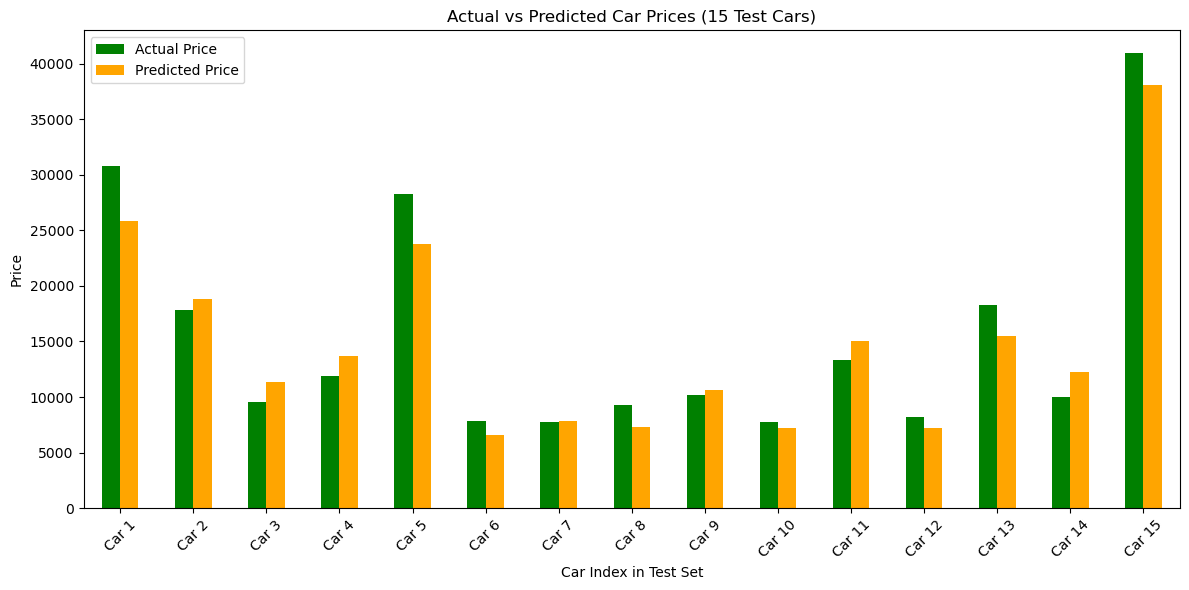

In [102]:
# Bar Chart for All 15 Cars in Test Sample
comparison15 = comparison.head(15).reset_index(drop=True)

comparison15.plot(
    kind="bar",
    figsize=(12,6),
    color=["green", "orange"]
)

plt.title("Actual vs Predicted Car Prices (15 Test Cars)")
plt.xlabel("Car Index in Test Set")
plt.ylabel("Price")
plt.xticks(range(15), [f"Car {i+1}" for i in range(15)], rotation=45)
plt.legend(["Actual Price", "Predicted Price"])
plt.tight_layout()
plt.show()


Here we can see the comparison of actual vs predicted car prices for 15 cars. The blue bars represent actual prices, and the orange bars represent predicted prices. We notice that while the model doesn’t always hit the exact value, the predicted bars follow the same trend as the actual bars, showing that the model is learning the relationship between car features and price.

I chose Linear Regression because my target variable, car price, is continuous, and this algorithm is simple, interpretable, and effective for small datasets. It allows us to understand the direct impact of features like engine size, horsepower, and car width on price. In real life, such a model can be used by car dealerships, insurance companies, and online platforms to predict fair prices for cars and assist customers in making informed decisions.